# Assignment 3

## The Knapsack-v2 Environment

In [1]:
#!pip install or-gym==0.5.0

In [2]:
#pip install gym==0.21.0

In [3]:
#pip install stable-baselines3

In [4]:
import numpy as np
import gym
import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

In [6]:
import or_gym

In [7]:
env = or_gym.make("Knapsack-v2", max_weight=300, mask=False)

In [8]:
action_space = env.action_space #Get number of actions in an environment 
state_space = env.observation_space #Get number of states in an environment 
print('Action space', action_space)
print('State space', state_space)

Action space Discrete(200)
State space Box([[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [9]:
action = env.action_space.sample() # sample an action from the env instance
print(action)

164


In [10]:
env.reset()
env.step(action) # call the step function of the env. and inspect quadruple of (state, reward, done, info)

(array([[ 83,  61,  33,  37,  84,  79,  44,  55,  93,  62,  93,  55,  95,
           1,  40,  59,  37,  73,  61,  56,  55,  31,  80,  94,  35,  75,
          63,   9,  33,  49,  37,  33,  56,  39,  45,  90,  90,  65,  23,
          57,  52,  10,  18,   9,  49,  72,  29,  47,  57,  58,   7,  26,
          97,  83,  23,  77,  85,  54,  17,  97,  91,  69,  29,  56,  89,
          41,  93,  94,  88,  57,  43,   7,  93,  16,  55,  19,  94,  23,
          43,  24,  29,  89,  59,  34,  88,  12,  17,  38,  30,  26,  90,
          28,  79,  21,  74,  14,  34,  58,  33,  70,  55,  44,  85,   4,
          99,  51,  52,  96,  27,  35,   9,   3,  82,  73,  58,  98,  14,
          82,  54,   2,  16,  71,  43,  51,  87,  32,  70,  73,  21,  81,
          78,  51,  16,  29,  65,  40,  76,  48,  62,   9,  77,  72,  80,
          99,  31,  58,   4,  13,  78,  70,  43,  25,  76,  60,  11,  42,
          41,  48,  36,  90,  53,  12,  18,  76,  51,  17,  35,  97,  33,
          70,   5,  60,  57,  43,  52,

In [11]:
print("Max weight capacity:\t{}kg".format(env.max_weight))
print("Number of items:\t{}".format(env.N))

Max weight capacity:	300kg
Number of items:	200


### Example 

In [12]:
actions = env.action_space.n
states = env.observation_space
states.shape

(3, 201)

In [13]:
env.reset()
episode = 0
done = False
reward_total = 0
weight_total = 0
elements = []
rewards = []
weights = []
highest = 0
for i in range(10):
    episode += 1
    print("Episode: " + str(episode))
    action = np.random.randint(actions)
    print("Take element number: " + str(action))
    next_state, reward, done, info = env.step(action)
    weight = next_state[0][action]
    print("Weight: " + str(weight))
    weights.append(weight)
    weight_total = weight_total + weight
    rewards.append(reward)
    elements.append(action)
    print("Reward: " + str(reward))
    print("Done: " + str(done))
    print("Info: " + str(info))
    reward_total = reward_total + reward
    print("Weight Total: ", int(weight_total))
    print("Reward Total: ", int(reward_total))
    print("Items chosen: ", elements)
    print("Rewards of the items: ", rewards)
    print("Weights of the items: ", weights)
    print(next_state)
    print(env.render())
    if weight_total >= 300:
        break
    i+=1
if reward_total > highest:
        highest = reward_total
print("Highest reward found: ", highest)

Episode: 1
Take element number: 137
Weight: 48
Reward: 74
Done: False
Info: {}
Weight Total:  48
Reward Total:  74
Items chosen:  [137]
Rewards of the items:  [74]
Weights of the items:  [48]
[[ 83  61  33  37  84  79  44  55  93  62  93  55  95   1  40  59  37  73
   61  56  55  31  80  94  35  75  63   9  33  49  37  33  56  39  45  90
   90  65  23  57  52  10  18   9  49  72  29  47  57  58   7  26  97  83
   23  77  85  54  17  97  91  69  29  56  89  41  93  94  88  57  43   7
   93  16  55  19  94  23  43  24  29  89  59  34  88  12  17  38  30  26
   90  28  79  21  74  14  34  58  33  70  55  44  85   4  99  51  52  96
   27  35   9   3  82  73  58  98  14  82  54   2  16  71  43  51  87  32
   70  73  21  81  78  51  16  29  65  40  76  48  62   9  77  72  80  99
   31  58   4  13  78  70  43  25  76  60  11  42  41  48  36  90  53  12
   18  76  51  17  35  97  33  70   5  60  57  43  52  85  78  79  73  39
   70  87  21  38  93  72  54  85   3  29  19  37   6  40  41  68  8

TypeError: KnapsackEnv.render() takes 1 positional argument but 2 were given

## Deep Q Network

In [51]:
from stable_baselines3 import DQN
import stable_baselines3
import torch as th

# Hyperparameters

total_timesteps = 200000
gamma = 0.995
target_update_interval = 10000
tau = 1.0
batch_size = 32
exploration_fraction = 0.01
lr = 0.0001
max_grad_norm = 100
train_freq = (100, "episode")
exploration_initial_eps=1.0
exploration_final_eps=0.05

policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[5,5,5]) # 3 hidden layers with 5 neurons each

#optimize_memory_usage=True,
#, tensorboard_log="model/DQN_Knapsack_tensorboard/"
#, tb_log_name="DQN_Knapsack"

model = DQN("MlpPolicy", env, learning_rate=lr,
            batch_size=batch_size, tau=tau, gamma=gamma, 
            gradient_steps=1, target_update_interval=target_update_interval, 
            exploration_fraction=exploration_fraction,
            exploration_initial_eps=exploration_initial_eps, exploration_final_eps=exploration_final_eps, 
            max_grad_norm=max_grad_norm, verbose=0, train_freq=train_freq)

model.learn(total_timesteps=total_timesteps, log_interval=10)
model.save(f'DQN_Best_{total_timesteps}')

In [52]:
theta = []
omega = []
rewards = []
cum_rew = 0
cum_rewards = []


# Simulating the agent
obs = env.reset()

try:
    for _ in range(100):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        cum_rew += reward
        cum_rewards.append(cum_rew)
        #env.render()
        # print(obs)
        # print(reward)
finally:
    #env.close()
    print("ok")

ok


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


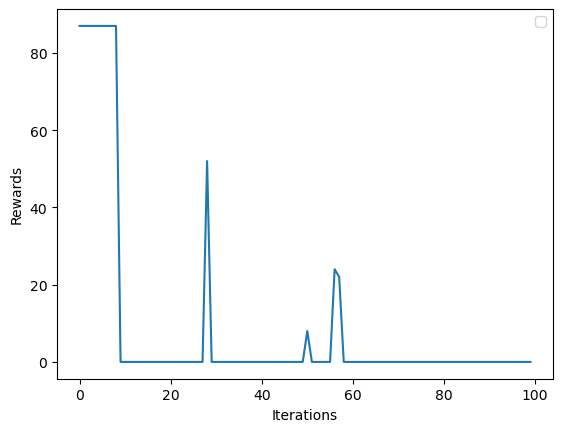

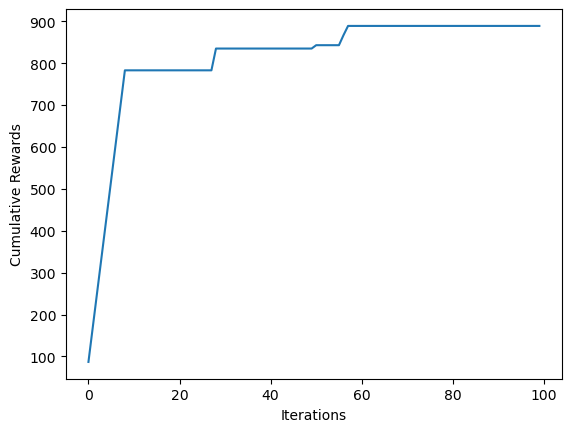

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.show()

In [ ]:
# Hyperparameters

total_timesteps = 2000000
gamma = 0.995
target_update_interval = 10000
tau = 1.0
batch_size = 32
exploration_fraction = 0.01
lr = 0.001
max_grad_norm = 100
train_freq = (100, "episode")
exploration_initial_eps=1.0
exploration_final_eps=0.05

policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[64,64]) # 2 hidden layers with 64 neurons each

#optimize_memory_usage=True,
#, tensorboard_log="model/DQN_Knapsack_tensorboard/"
#, tb_log_name="DQN_Knapsack"

model = DQN("MlpPolicy", env, learning_rate=lr,
            batch_size=batch_size, tau=tau, gamma=gamma, 
            gradient_steps=1, target_update_interval=target_update_interval, 
            exploration_fraction=exploration_fraction,
            exploration_initial_eps=exploration_initial_eps, exploration_final_eps=exploration_final_eps, 
            max_grad_norm=max_grad_norm, verbose=0, train_freq=train_freq)

model.learn(total_timesteps=total_timesteps, log_interval=10)
model.save(f'DQN_Best_{total_timesteps}')

In [ ]:
theta = []
omega = []
rewards = []
cum_rew = 0
cum_rewards = []


# Simulating the agent
obs = env.reset()

try:
    for _ in range(100):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        cum_rew += reward
        cum_rewards.append(cum_rew)
        #env.render()
        # print(obs)
        # print(reward)
finally:
    #env.close()
    print("ok")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.show()

## A2C

In [25]:
#conda install pytorch==1.12.1 torchvision==0.13.1 torchaudio==0.12.1 cpuonly -c pytorch

In [42]:
from stable_baselines3 import A2C
import torch as th

# Hyperparameters
total_timesteps = 2000000
gamma = 0.99
target_update_interval = 1000
#value_coeff = 0.6 # vf_coef= value_coeff,
#entropy_coeff = 0.9 # ent_coef = entropy_coeff, 
lr = 0.001
max_grad_norm = 1
rms_prop_eps = 1e-06


policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[32,32]) # 2 hidden layers with 32 neurons each

#create_eval_env=False,
#tb_log_name="A2C_Knapsack"

model = A2C("MlpPolicy", env, learning_rate=lr, n_steps = 100, gamma = gamma, 
            max_grad_norm = max_grad_norm, rms_prop_eps = rms_prop_eps, use_rms_prop = True, 
            normalize_advantage= False,   
            policy_kwargs = policy_kwargs, verbose = 0,  tensorboard_log=None)


model.learn(total_timesteps=total_timesteps, log_interval=1000)
model.save(f'A2C_Best_{total_timesteps}')

In [43]:
vtheta = []
omega = []
rewards = []
cum_rew = 0
cum_rewards = []


# Simulating the agent
obs = env.reset()

try:
    for _ in range(100):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        cum_rew += reward
        cum_rewards.append(cum_rew)
        # print(obs)
        # print(reward)
finally:
    #env.close()
    print("ok")

print("Rewards: ", rewards)
print("Cumulative Rewards: ", cum_rewards)

ok
Rewards:  [94, 75, 87, 87, 90, 50, 63, 90, 94, 94, 90, 50, 99, 94, 56, 50, 90, 87, 50, 67, 63, 87, 94, 87, 95, 90, 24, 81, 81, 50, 63, 87, 87, 87, 87, 87, 94, 50, 63, 81, 0, 81, 81, 50, 0, 0, 0, 0, 0, 0, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cumulative Rewards:  [94, 169, 256, 343, 433, 483, 546, 636, 730, 824, 914, 964, 1063, 1157, 1213, 1263, 1353, 1440, 1490, 1557, 1620, 1707, 1801, 1888, 1983, 2073, 2097, 2178, 2259, 2309, 2372, 2459, 2546, 2633, 2720, 2807, 2901, 2951, 3014, 3095, 3095, 3176, 3257, 3307, 3307, 3307, 3307, 3307, 3307, 3307, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401, 3401]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


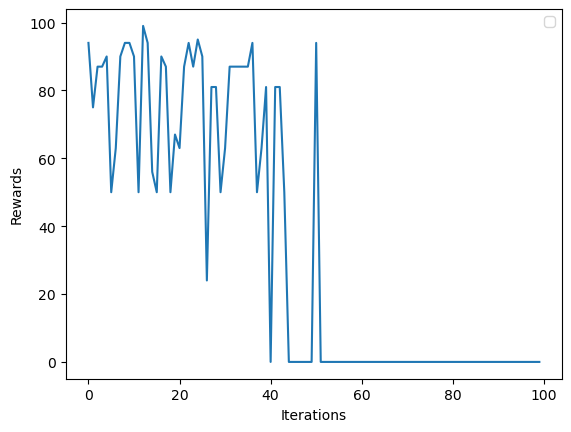

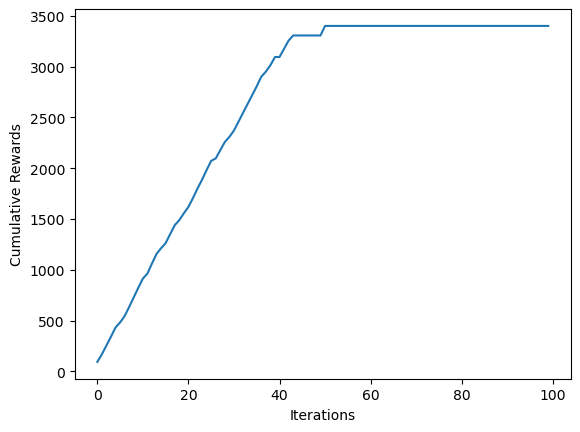

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.show()

In [ ]:
from stable_baselines3 import A2C
import torch as th

# Hyperparameters
total_timesteps = 2000000
gamma = 0.99
target_update_interval = 1000
#value_coeff = 0.6 # vf_coef= value_coeff,
#entropy_coeff = 0.9 # ent_coef = entropy_coeff, 
lr = 0.001
max_grad_norm = 1
rms_prop_eps = 1e-06

policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[5,5,5]) 

#create_eval_env=False,
#tb_log_name="A2C_Knapsack"

model = A2C("MlpPolicy", env, learning_rate=lr, n_steps = 100, gamma = gamma, 
            max_grad_norm = max_grad_norm, rms_prop_eps = rms_prop_eps, use_rms_prop = True, 
            normalize_advantage= False,   
            policy_kwargs = policy_kwargs, verbose = 0,  tensorboard_log=None)


model.learn(total_timesteps=total_timesteps, log_interval=1000)
model.save(f'A2C_Best_{total_timesteps}')

In [ ]:
vtheta = []
omega = []
rewards = []
cum_rew = 0
cum_rewards = []


# Simulating the agent
obs = env.reset()

try:
    for _ in range(100):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        cum_rew += reward
        cum_rewards.append(cum_rew)
        # print(obs)
        # print(reward)
finally:
    #env.close()
    print("ok")

print("Rewards: ", rewards)
print("Cumulative Rewards: ", cum_rewards)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.show()

PPO

In [65]:
from stable_baselines3 import PPO


# Hyperparameters
total_timesteps = 2000000
gamma = 0.99
lr = 0.0003
normalize_adv = True
n_epochs = 100
batch_size = 64
gae_lambda = 0.9
clip_range=0.2
#ent_coef=0.0 
#vf_coef=0.5
max_grad_norm=0.5

policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[64,64]) # 2 hidden layers with 32 neurons each

#create_eval_env=False,
#tb_log_name="A2C_Knapsack"

model = PPO("MlpPolicy", env, learning_rate=lr, n_steps = 100, gamma = gamma, 
            n_epochs=n_epochs, batch_size=batch_size, gae_lambda=gae_lambda, 
            clip_range=clip_range, normalize_advantage=normalize_adv, ent_coef=ent_coef, 
            vf_coef=vf_coef, max_grad_norm=max_grad_norm,  
            policy_kwargs = policy_kwargs, verbose = 1,  tensorboard_log=None)


model.learn(total_timesteps=total_timesteps, log_interval=1000)
model.save(f'PPO_Best_{total_timesteps}')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [66]:
vtheta = []
omega = []
rewards = []
cum_rew = 0
cum_rewards = []


# Simulating the agent
obs = env.reset()

try:
    for _ in range(100):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        cum_rew += reward
        cum_rewards.append(cum_rew)
        # print(obs)
        # print(reward)
finally:
    #env.close()
    print("ok")

print("Rewards: ", rewards)
print("Cumulative Rewards: ", cum_rewards)

ok
Rewards:  [63, 63, 99, 67, 99, 50, 87, 99, 94, 99, 63, 50, 90, 94, 90, 87, 50, 50, 50, 67, 50, 87, 96, 87, 50, 67, 87, 54, 95, 24, 87, 0, 96, 24, 87, 90, 95, 54, 87, 94, 94, 0, 24, 24, 87, 94, 0, 0, 0, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cumulative Rewards:  [63, 126, 225, 292, 391, 441, 528, 627, 721, 820, 883, 933, 1023, 1117, 1207, 1294, 1344, 1394, 1444, 1511, 1561, 1648, 1744, 1831, 1881, 1948, 2035, 2089, 2184, 2208, 2295, 2295, 2391, 2415, 2502, 2592, 2687, 2741, 2828, 2922, 3016, 3016, 3040, 3064, 3151, 3245, 3245, 3245, 3245, 3339, 3339, 3339, 3339, 3339, 3339, 3339, 3339, 3339, 3339, 3339, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


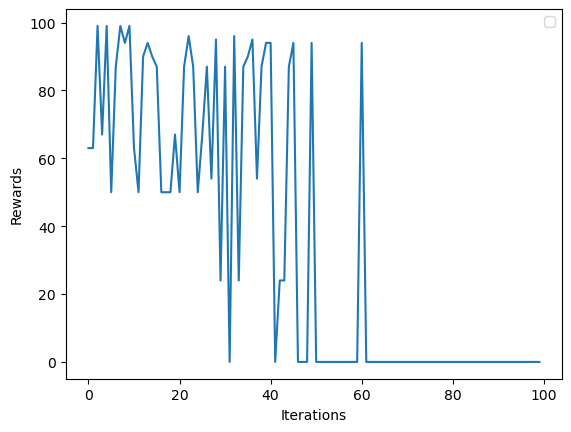

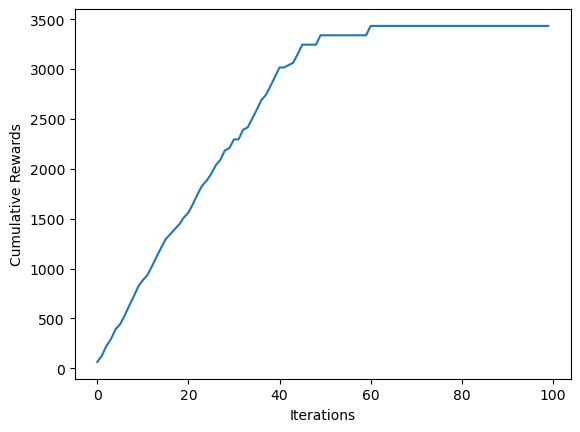

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.show()

In [ ]:
# Hyperparameters
total_timesteps = 2000000
gamma = 0.99
lr = 0.0003
normalize_adv = True
n_epochs = 100
batch_size = 64
gae_lambda = 0.9
clip_range=0.2
#ent_coef=0.0 
#vf_coef=0.5
max_grad_norm=0.5
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[5,5,5]) 

#create_eval_env=False,
#tb_log_name="A2C_Knapsack"

model = PPO("MlpPolicy", env, learning_rate=lr, n_steps = 100, gamma = gamma, 
            n_epochs=n_epochs, batch_size=batch_size, gae_lambda=gae_lambda, 
            clip_range=clip_range, normalize_advantage=normalize_adv, ent_coef=ent_coef, 
            vf_coef=vf_coef, max_grad_norm=max_grad_norm,  
            policy_kwargs = policy_kwargs, verbose = 1,  tensorboard_log=None)


model.learn(total_timesteps=total_timesteps, log_interval=1000)
model.save(f'PPO_Best_{total_timesteps}')

In [ ]:
vtheta = []
omega = []
rewards = []
cum_rew = 0
cum_rewards = []


# Simulating the agent
obs = env.reset()

try:
    for _ in range(100):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        cum_rew += reward
        cum_rewards.append(cum_rew)
        # print(obs)
        # print(reward)
finally:
    #env.close()
    print("ok")

print("Rewards: ", rewards)
print("Cumulative Rewards: ", cum_rewards)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.show()